In [1]:
import numpy as np 
import pandas as pd

In [2]:
data = np.loadtxt("data/outside.csv", delimiter=",",skiprows=1)

print("First 10 rows: \n\n",data[:10,],"\n\n")

X_train = data[:,:-1]
y_train = data[:,-1]


'''
Feature 1: Whether it is raining or not (1 if it is raining, 0 otherwise)
Feature 2: Whether the temperature is above 50 degrees Fahrenheit or not (1 if it is, 0 otherwise)
Feature 3: Whether it is windy or not (1 if it is windy, 0 otherwise)
Feature 4: Whether the day is a weekday or not (1 if it is a weekday, 0 otherwise)
Target: Whether a person goes outside or not (1 if they do, 0 otherwise)
'''

First 10 rows: 

 [[0. 1. 0. 0. 1.]
 [1. 1. 1. 1. 0.]
 [1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1.]
 [1. 0. 0. 1. 0.]] 




'\nFeature 1: Whether it is raining or not (1 if it is raining, 0 otherwise)\nFeature 2: Whether the temperature is above 50 degrees Fahrenheit or not (1 if it is, 0 otherwise)\nFeature 3: Whether it is windy or not (1 if it is windy, 0 otherwise)\nFeature 4: Whether the day is a weekday or not (1 if it is a weekday, 0 otherwise)\nTarget: Whether a person goes outside or not (1 if they do, 0 otherwise)\n'

       is_raining  temperature_above_50    is_windy  is_weekday  goes_outside
count      100.00            100.000000  100.000000  100.000000    100.000000
mean         0.45              0.510000    0.460000    0.580000      0.420000
std          0.50              0.502418    0.500908    0.496045      0.496045
min          0.00              0.000000    0.000000    0.000000      0.000000
25%          0.00              0.000000    0.000000    0.000000      0.000000
50%          0.00              1.000000    0.000000    1.000000      0.000000
75%          1.00              1.000000    1.000000    1.000000      1.000000
max          1.00              1.000000    1.000000    1.000000      1.000000
                      is_raining  temperature_above_50  is_windy  is_weekday  \
is_raining              1.000000             -0.038199 -0.068562    0.118106   
temperature_above_50   -0.038199              1.000000  0.101947   -0.104568   
is_windy               -0.068562              0.101947  1.

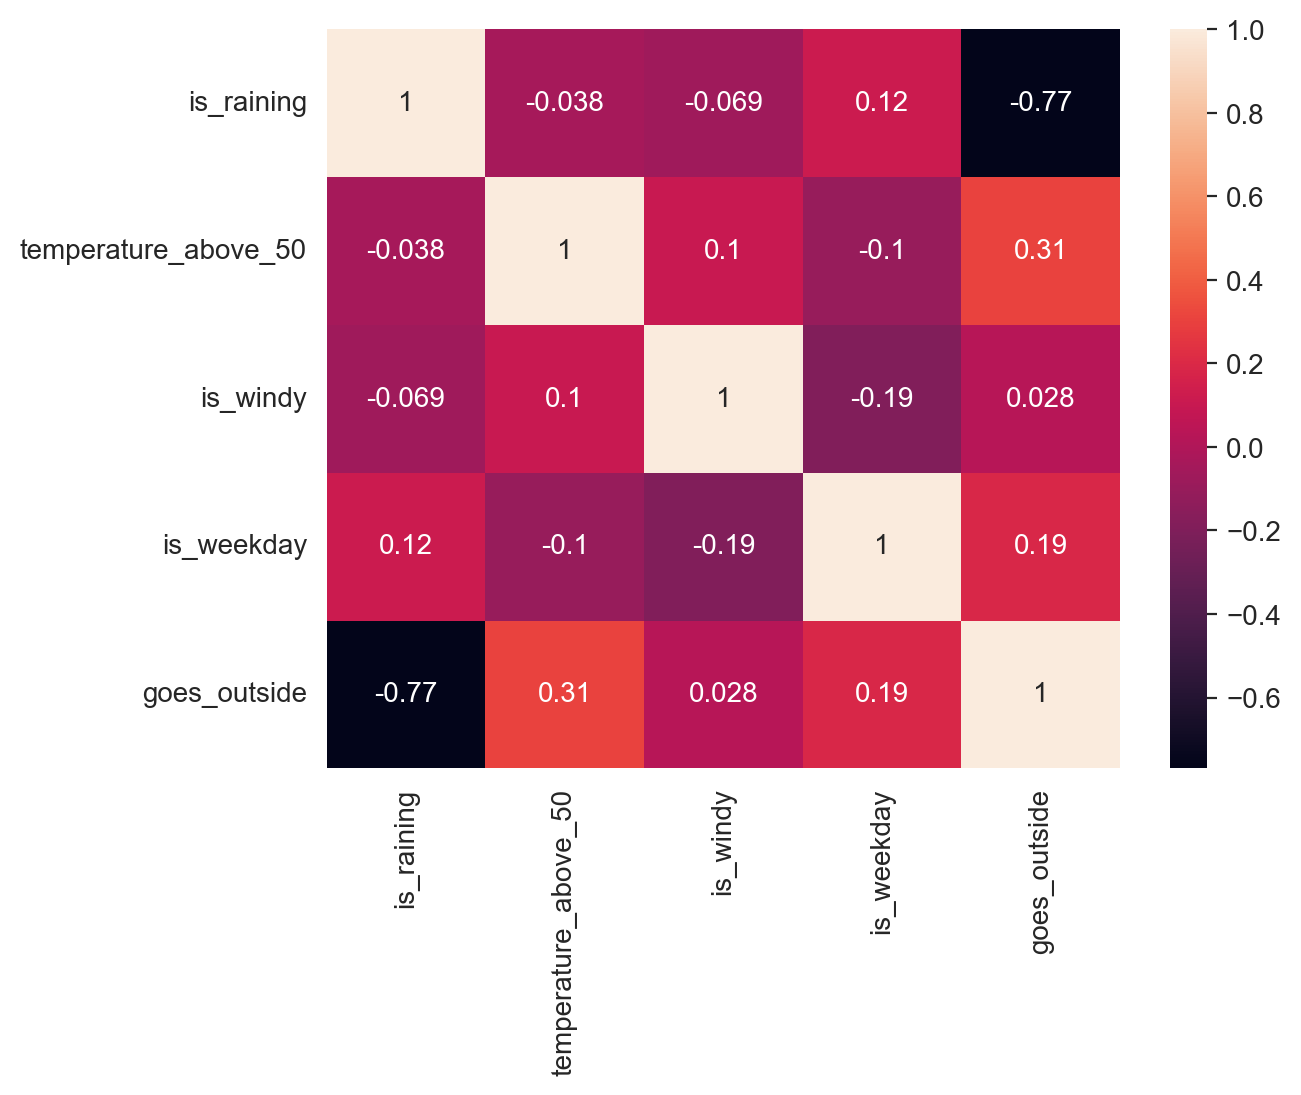

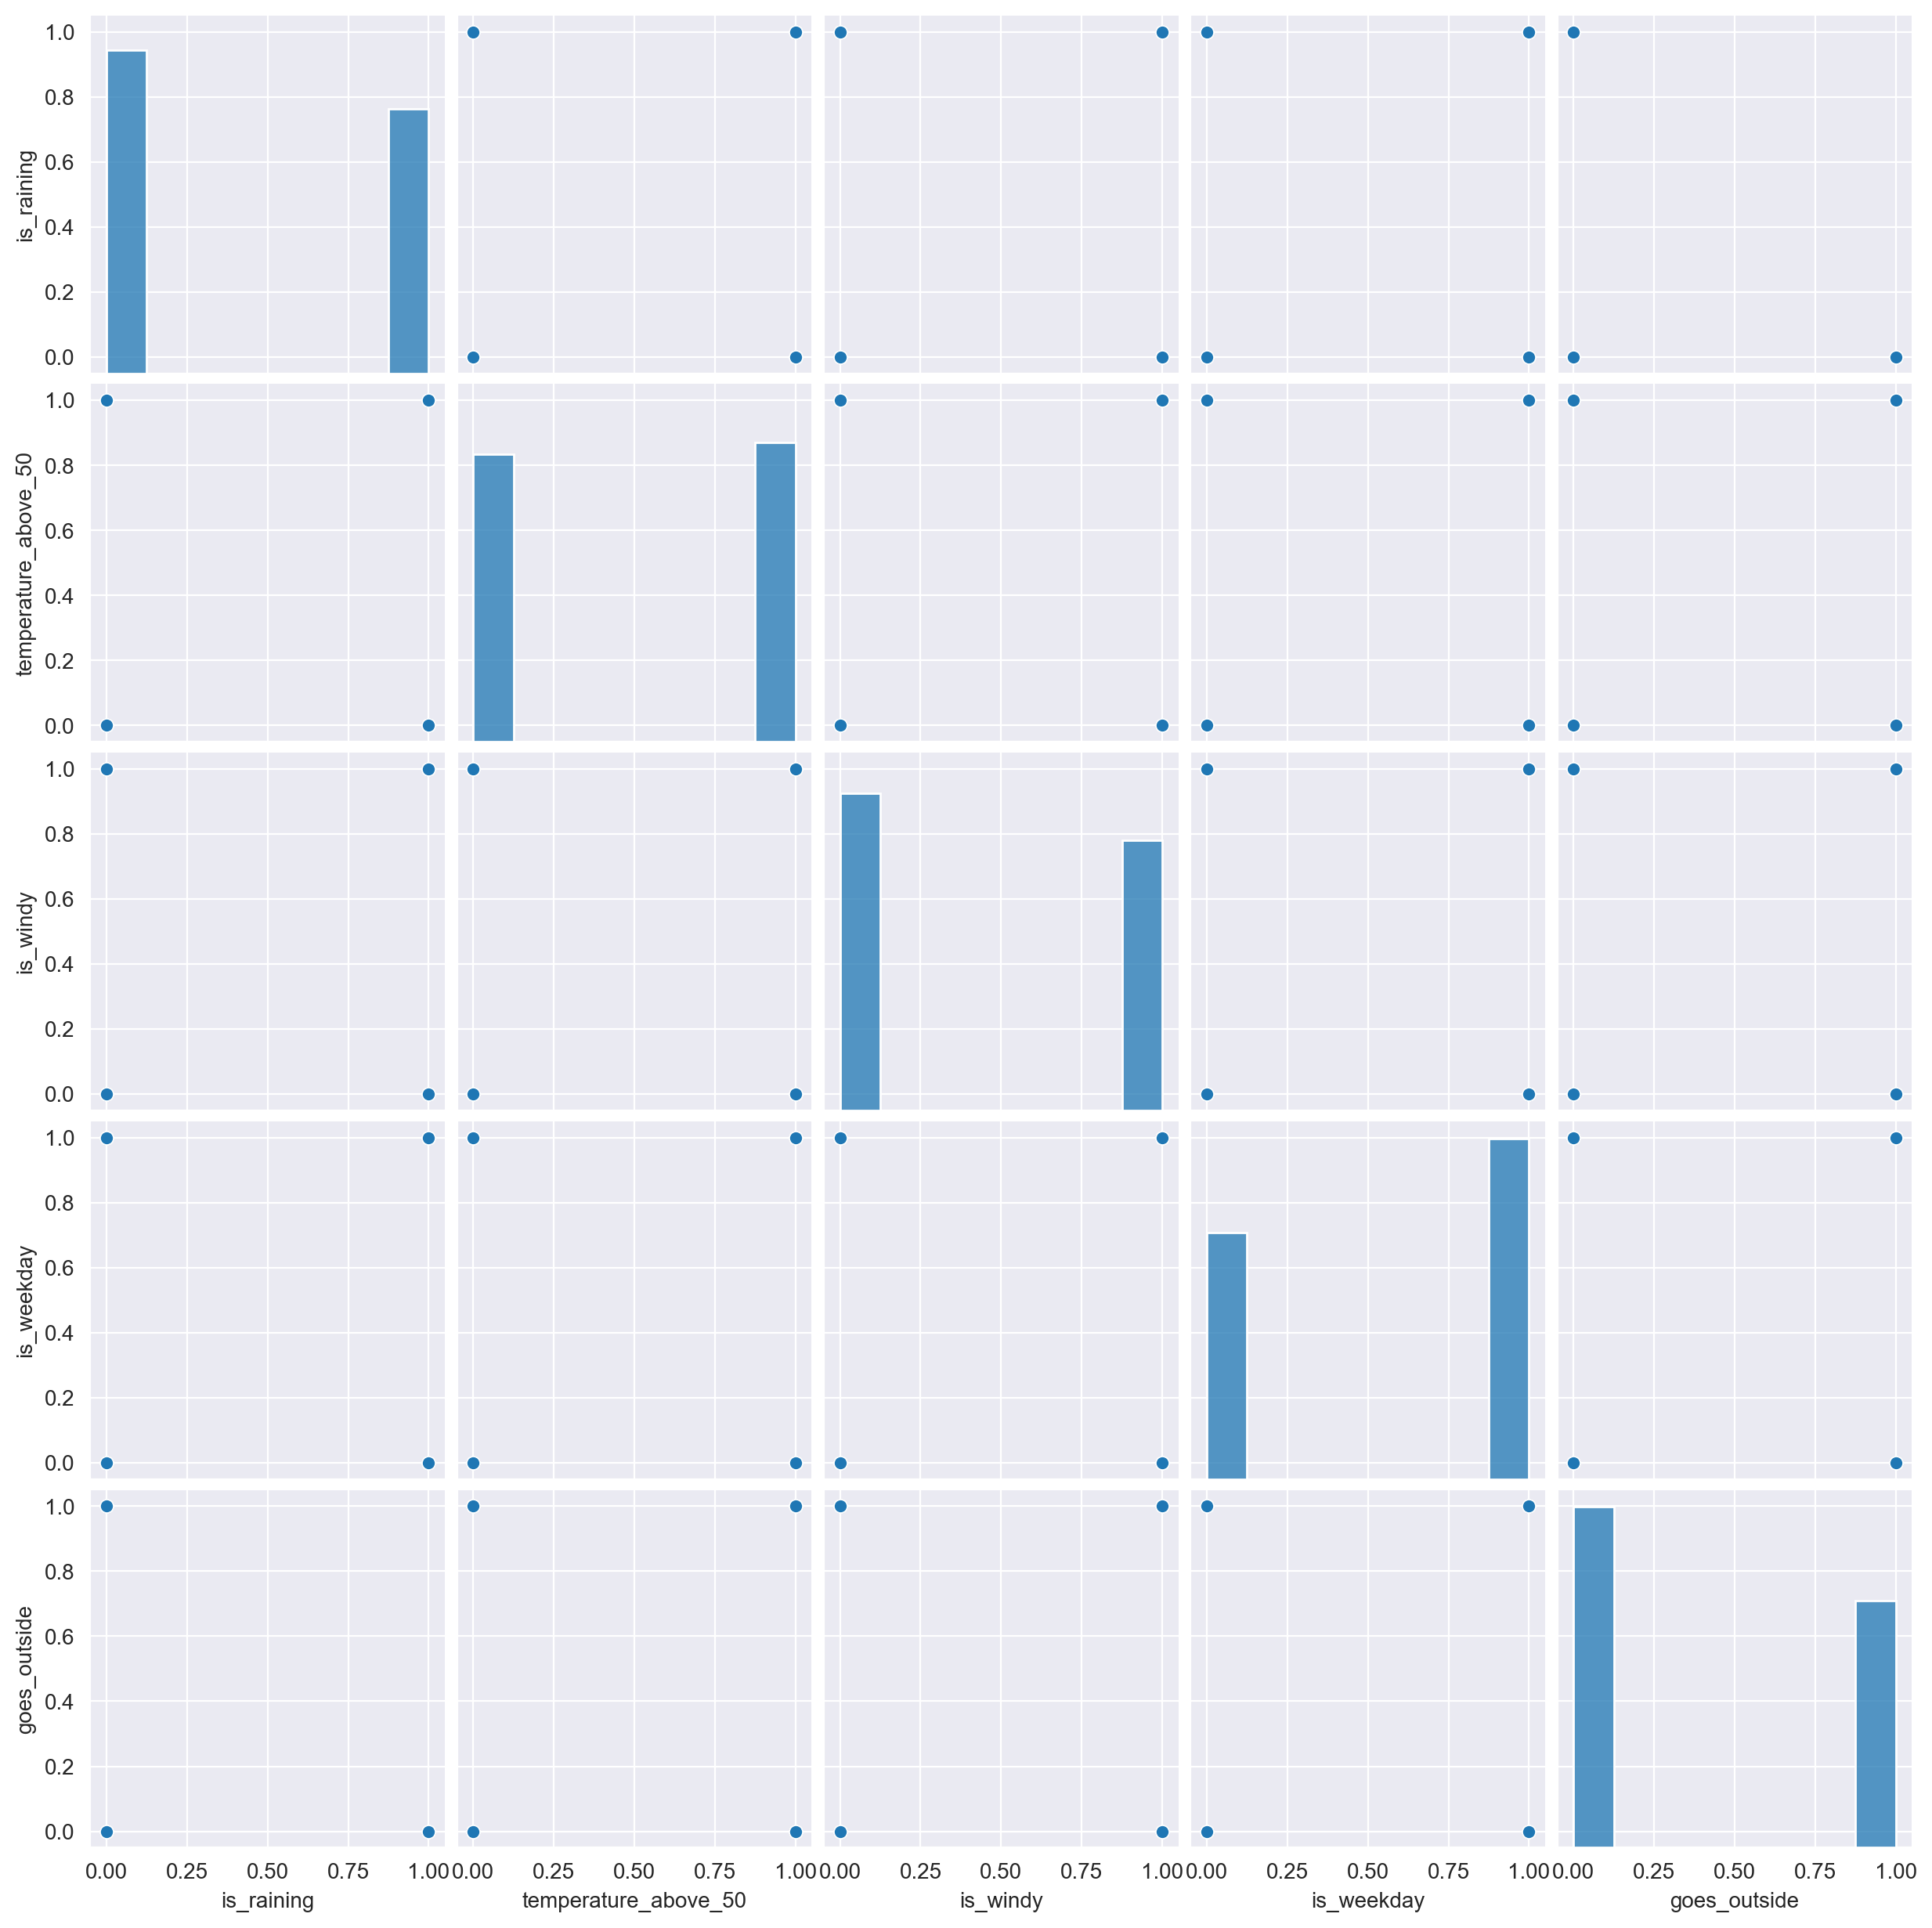

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 200

# loading the data
df = pd.read_csv('data/outside.csv')

# descriptive statistics
print(df.describe())

# correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

# heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()

# pairplot
sns.pairplot(df)
plt.show()



In [4]:
def entropy(p):
    return 0 if p in {0, 1} else -p * np.log2(p) - (1 - p) * np.log2(1 - p)

In [5]:
#initial attempt -> build_gini_tree
'''
#option 1: 
def gini_criterion(X, y, left_subtree, right_subtree):
    if len(left_subtree) == 0:
        p_right = sum(y[right_subtree])/len(right_subtree)
        gini_right = 1 - (p_right**2 + (1 - p_right)**2)
        return gini_right
    
    elif len(right_subtree) == 0:
        p_left = sum(y[left_subtree])/len(left_subtree)
        gini_left = 1 - (p_left**2 + (1 - p_left)**2)
        return gini_left
    
    else:
        p_left, p_right = sum(y[left_subtree])/len(left_subtree), sum(y[right_subtree])/len(right_subtree)
        gini_left = 1 - (p_left**2 + (1 - p_left)**2)
        gini_right = 1 - (p_right**2 + (1 - p_right)**2)
        return len(left_subtree) / (len(left_subtree) + len(right_subtree)) * gini_left + len(right_subtree) / (len(left_subtree) + len(right_subtree)) * gini_right


'''
#option 2:
def gini_criterion(y, left_subtree, right_subtree):
    if len(left_subtree) != 0:
        p_left = sum(y[left_subtree])/len(left_subtree)
        gini_left = 2 * p_left * (1 - p_left)
    else:
        gini_left = 0

    if len(right_subtree) != 0:
        p_right = sum(y[right_subtree])/len(right_subtree)
        gini_right = 2 * p_right * (1 - p_right)
    else:
        gini_right = 0

    gini = len(left_subtree) / (len(left_subtree) + len(right_subtree)) * gini_left + len(right_subtree) / (len(left_subtree) + len(right_subtree)) * gini_right
    return gini




In [6]:
#passing X[subtree] to calculate for each feature in the subtree
def decision_node_split(X, feature_index): 
    #storing indices in the subtrees
    left_subtree = [i for i, x in enumerate(X) if x[feature_index] == 1]
    right_subtree = [i for i, x in enumerate(X) if x[feature_index] == 0]
    return left_subtree, right_subtree


In [7]:
#weighted entropy
def weighted_entropy(X,y,left_subtree,right_subtree):
    w_left, w_right = len(left_subtree)/len(X), len(right_subtree)/len(X)
    p_left, p_right = sum(y[left_subtree])/len(left_subtree), sum(y[right_subtree])/len(right_subtree)
    
    return w_left * entropy(p_left) + w_right * entropy(p_right)


In [8]:
#information_gain = root_entropy - weighted_entropy
def information_gain(X, y, left_subtree, right_subtree):
    root_node = sum(y)/len(y)
    root_entropy = entropy(root_node)
    return root_entropy - weighted_entropy(X,y,left_subtree, right_subtree)

In [9]:
df = pd.read_csv('data/outside.csv')

print("Information Gain - split at the root node:\n")
for i, feature_name in enumerate(df.keys().to_numpy()[:-1]):
    left_subtree, right_subtree = decision_node_split(X_train, i)
    information_gain_i = information_gain(X_train, y_train, left_subtree, right_subtree)
    print(f"{feature_name}: {information_gain_i:.2f}")
    

Information Gain - split at the root node:

is_raining: 0.55
temperature_above_50: 0.07
is_windy: 0.00
is_weekday: 0.03


In [10]:
#Tree_Node 
class Tree_Node:
    def __init__(self, indices, depth):
        self.indices = indices
        self.depth = depth
        self.left = None
        self.right = None
        self.feature_index = None
        self.is_leaf = False
        self.prediction = None
        self.gini = None
        self.entropy = None


In [11]:
def build_tree(X, y, depth, max_depth):
    indices = list(range(len(y)))
    
    #if max depth or len(set(y[indices])) == 1 (i.e pure)
    if depth == max_depth or len(set(y[indices])) == 1:
        node = Tree_Node(indices, depth)
        node.is_leaf = True
        node.prediction = round(sum(y[indices]) / len(indices))
        node.entropy = entropy(node.prediction)
        return node

    
    best_gain = -np.inf
    best_split = None
    best_index = None

    #selecting the best feature to split on (GOAL -> MAXIMISE)
    for feature_index in range(X.shape[1]):
        left_subtree, right_subtree = decision_node_split(X[indices], feature_index)
    
        #continue if left_subtree or right_subtree is 0
        if len(left_subtree) == 0 or len(right_subtree) == 0: continue

        gain = information_gain(X[indices],y[indices],left_subtree, right_subtree)
        
        #updating if a higher gain is found
        if gain > best_gain:
            best_gain = gain
            best_split = (left_subtree, right_subtree)
            best_index = feature_index
    
    #recursion
    node = Tree_Node(indices, depth)
    node.feature_index = best_index
    node.entropy = entropy(sum(y[indices]) / len(indices))
    node.left = build_tree(X[best_split[0]], y[best_split[0]], depth + 1, max_depth)
    node.right = build_tree(X[best_split[1]], y[best_split[1]], depth + 1, max_depth)

    return node

In [12]:
max_depth = 3
root = build_tree(X_train, y_train, 0, max_depth)

In [13]:
def print_tree(node, feature_names, depth=0):
    indent = "  " * depth
    if node.is_leaf:
        print(f"{indent}Leaf[Samples: {len(node.indices)} Prediction: {node.prediction} Entropy: {node.entropy}]")
    else:
        print(f"{indent}Node[Samples: {len(node.indices)} Feature: {feature_names[node.feature_index]}  Entropy: {node.entropy}]")
        print(f"{indent}Left:")
        print_tree(node.left, feature_names, depth + 1)
        print(f"{indent}Right:")
        print_tree(node.right, feature_names, depth + 1)

feature_names = df.keys().to_numpy()

print("Entropy: (compare it with sklearn.tree.plot_tree [random_state = 0] )\n")
print_tree(root, feature_names)



Entropy: (compare it with sklearn.tree.plot_tree [random_state = 0] )

Node[Samples: 100 Feature: is_raining  Entropy: 0.9814538950336535]
Left:
  Leaf[Samples: 45 Prediction: 0 Entropy: 0]
Right:
  Node[Samples: 55 Feature: temperature_above_50  Entropy: 0.7889406572966209]
  Left:
    Leaf[Samples: 29 Prediction: 1 Entropy: 0]
  Right:
    Node[Samples: 26 Feature: is_weekday  Entropy: 1.0]
    Left:
      Leaf[Samples: 13 Prediction: 1 Entropy: 0]
    Right:
      Leaf[Samples: 13 Prediction: 0 Entropy: 0]


In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

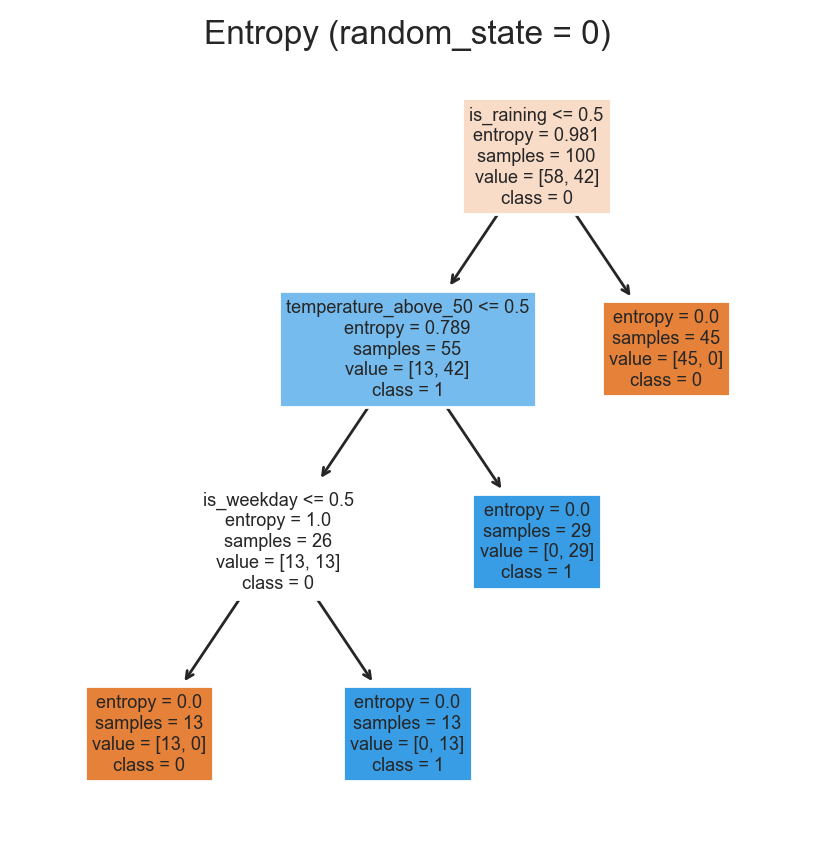

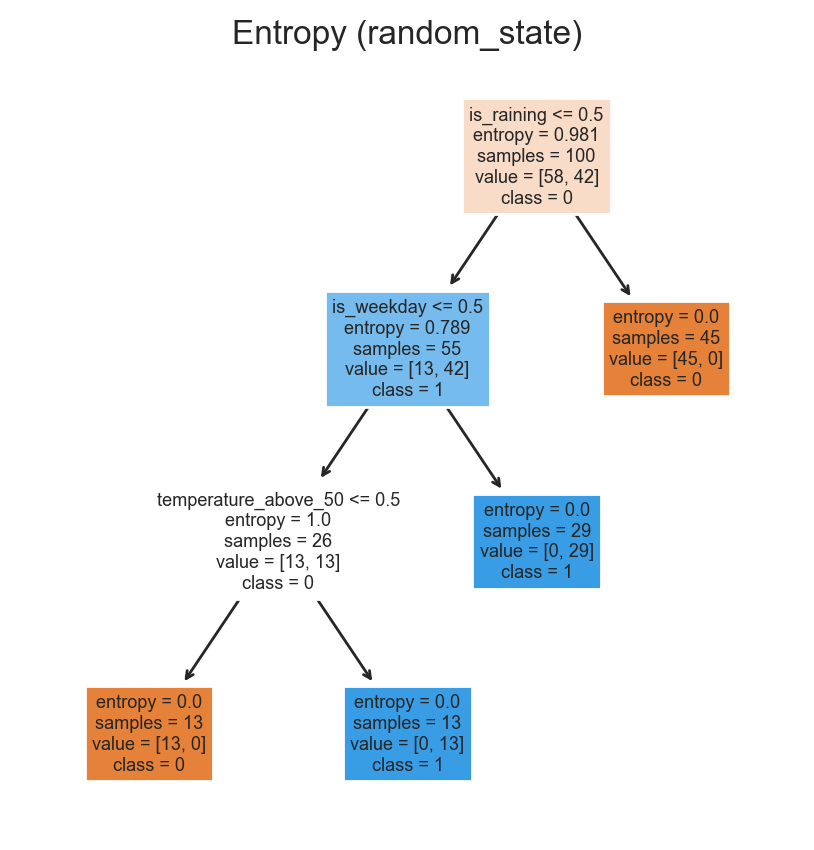

In [15]:
import matplotlib.pyplot as plt
#----------------- random_state = 0
classifier_entropy = DecisionTreeClassifier(max_depth=3, random_state=0,criterion='entropy')
classifier_entropy.fit(X_train, y_train)

plt.figure(figsize=(5,5))
plot_tree(classifier_entropy, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Entropy (random_state = 0)")
plt.show()

#----------------- with random_state 

classifier_entropy = DecisionTreeClassifier(max_depth=3, random_state=15,criterion='entropy')
classifier_entropy.fit(X_train, y_train)

plt.figure(figsize=(5,5))
plot_tree(classifier_entropy, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Entropy (random_state)")
plt.show()


In [16]:
def build_tree_gini(X, y, depth, max_depth):
    indices = list(range(len(y)))
    
    #if max depth or len(set(y[indices])) == 1 (i.e pure)
    if depth == max_depth or len(set(y[indices])) == 1:
        node = Tree_Node(indices, depth)
        node.is_leaf = True
        node.prediction = round(sum(y[indices]) / len(indices))
        node.gini = 0  # Gini impurity for leaf nodes is 0 considering it is pure
        return node

    best_gain = np.inf
    best_split = None
    best_index = None
    
    #selecting the best feature to split on (GOAL -> MINIMISE)
    for feature_index in range(X.shape[1]):
        left_subtree, right_subtree = decision_node_split(X[indices], feature_index)

        if len(left_subtree) == 0 or len(right_subtree) == 0: continue

        gain = gini_criterion(y[indices],left_subtree, right_subtree)

        #updating if a lower gain is found
        if gain < best_gain:
            best_gain = gain
            best_split = (left_subtree, right_subtree)
            best_index = feature_index

    #recursion
    node = Tree_Node(indices, depth)
    node.feature_index = best_index
    node.gini = best_gain
    node.left = build_tree_gini(X[best_split[0]], y[best_split[0]], depth + 1, max_depth)
    node.right = build_tree_gini(X[best_split[1]], y[best_split[1]], depth + 1, max_depth)

    return node

In [17]:
print("Gini - split at the root node:\n")
for i, feature_name in enumerate(df.keys().to_numpy()[:-1]):
    left_subtree, right_subtree = decision_node_split(X_train, i)
    gini_i = gini_criterion(y_train, left_subtree, right_subtree)
    print(f"{feature_name}: {gini_i:.2f}")
    

Gini - split at the root node:

is_raining: 0.20
temperature_above_50: 0.44
is_windy: 0.49
is_weekday: 0.47


In [18]:
def print_tree_gini(node, feature_names, depth=0):
    indent = "  " * depth
    if node.is_leaf:
        print(f"{indent}Leaf[Samples: {len(node.indices)} Prediction: {node.prediction} Gini: {node.gini}]")
    else:
        print(f"{indent}Node[Samples: {len(node.indices)} Feature: {feature_names[node.feature_index]} Gini: {node.gini}]")
        print(f"{indent}Left:")
        print_tree_gini(node.left, feature_names, depth + 1)
        print(f"{indent}Right:")
        print_tree_gini(node.right, feature_names, depth + 1)

feature_names = df.keys().to_numpy()

root_gini = build_tree_gini(X_train, y_train, 0, max_depth)
print("Gini: (works but doesn't match with sklear.tree.plot_tree )\n")
print_tree_gini(root_gini, feature_names)



Gini: (works but doesn't match with sklear.tree.plot_tree )

Node[Samples: 100 Feature: is_raining Gini: 0.19854545454545455]
Left:
  Leaf[Samples: 45 Prediction: 0 Gini: 0]
Right:
  Node[Samples: 55 Feature: temperature_above_50 Gini: 0.23636363636363636]
  Left:
    Leaf[Samples: 29 Prediction: 1 Gini: 0]
  Right:
    Node[Samples: 26 Feature: is_weekday Gini: 0.0]
    Left:
      Leaf[Samples: 13 Prediction: 1 Gini: 0]
    Right:
      Leaf[Samples: 13 Prediction: 0 Gini: 0]


In [19]:
#gini impurtity 
def gini_impurity(y):
    total_samples = len(y)
    class_counts = np.bincount(y.astype(int))
    class_probs = class_counts / total_samples
    gini = 1 - np.sum(class_probs**2)
    return gini

#gini_decrease -> impurity_decrease (MAXIMIZE)
def gini_decrease(y, left_subtree, right_subtree):
    initial_impurity = gini_impurity(y)
    
    gini_left = gini_impurity(y[left_subtree])
    gini_right = gini_impurity(y[right_subtree])

    total_samples = len(y)
    total_samples_left = len(left_subtree)
    total_samples_right = len(right_subtree)
    
    split_impurity = (total_samples_left / total_samples) * gini_left + (total_samples_right / total_samples) * gini_right

    impurity_decrease = initial_impurity - split_impurity

    return impurity_decrease


#decision_node_split (passing the original X)
def decision_node_split_advanced(X, indices, feature_index):
    left_subtree = [i for i in indices if X[i][feature_index] == 1]
    right_subtree = [i for i in indices if X[i][feature_index] == 0]
    return left_subtree, right_subtree

#build_tree_gini_advanced (passing original X and Y, indicies = subtree)
def build_tree_gini_advanced(X, y, indices, depth, max_depth):
    if depth == max_depth or len(set(y[indices])) == 1:
        node = Tree_Node(indices, depth)
        node.is_leaf = True
        node.prediction = round(sum(y[indices]) / len(indices))
        node.gini = gini_impurity(y[indices])  
        return node

    best_gain = -np.inf  
    best_split = None
    best_index = None
    
    #calucluating gain for each feature (GOAL -> MAXIMISE)
    for feature_index in range(X.shape[1]):
        left_subtree, right_subtree = decision_node_split_advanced(X, indices, feature_index)


        if len(left_subtree) == 0 or len(right_subtree) == 0: continue

        gain = gini_decrease(y, left_subtree, right_subtree)  

        if gain > best_gain:  # higher gini decrease is better
            best_gain = gain
            best_split = (left_subtree, right_subtree)
            best_index = feature_index

    #recursion
    node = Tree_Node(indices, depth)
    node.feature_index = best_index
    node.gini = gini_impurity(y[indices])
    node.left = build_tree_gini_advanced(X, y, best_split[0], depth + 1, max_depth)  
    node.right = build_tree_gini_advanced(X, y, best_split[1], depth + 1, max_depth) 
    return node


indices = list(range(len(y_train)))
root_gini_advanced = build_tree_gini_advanced(X_train, y_train, indices, 0, max_depth)

print("Gini: (matches with sklearn.tree.plot_tree [random_state = 0] )\n")
print_tree_gini(root_gini_advanced,feature_names)


Gini: (matches with sklearn.tree.plot_tree [random_state = 0] )

Node[Samples: 100 Feature: is_raining Gini: 0.4872000000000001]
Left:
  Leaf[Samples: 45 Prediction: 0 Gini: 0.0]
Right:
  Node[Samples: 55 Feature: temperature_above_50 Gini: 0.3609917355371901]
  Left:
    Leaf[Samples: 29 Prediction: 1 Gini: 0.0]
  Right:
    Node[Samples: 26 Feature: is_weekday Gini: 0.5]
    Left:
      Leaf[Samples: 13 Prediction: 1 Gini: 0.0]
    Right:
      Leaf[Samples: 13 Prediction: 0 Gini: 0.0]


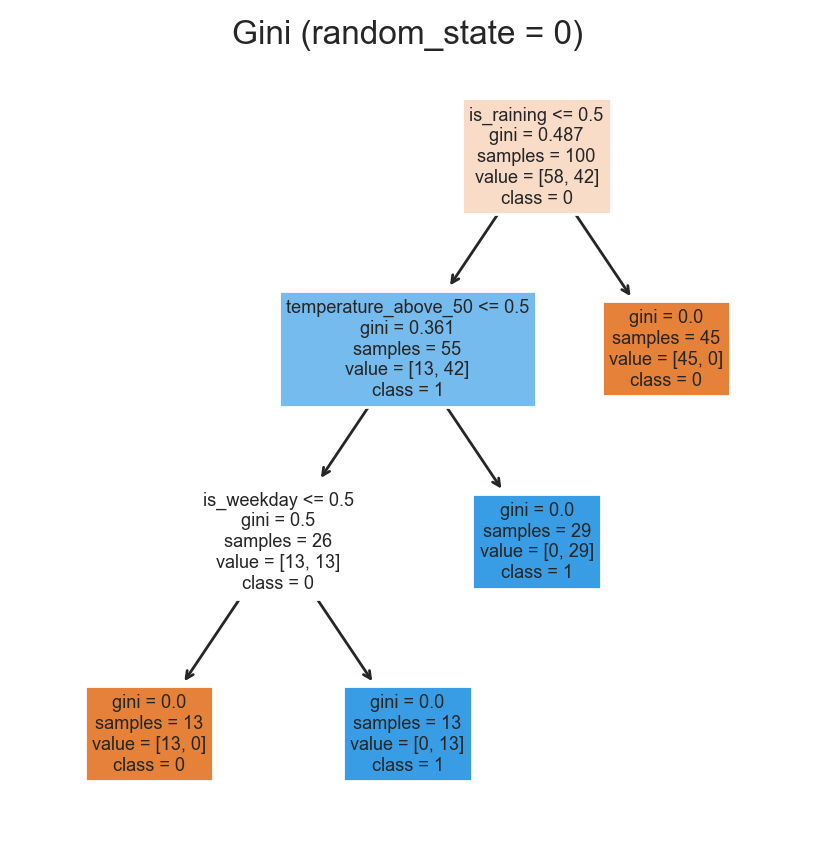

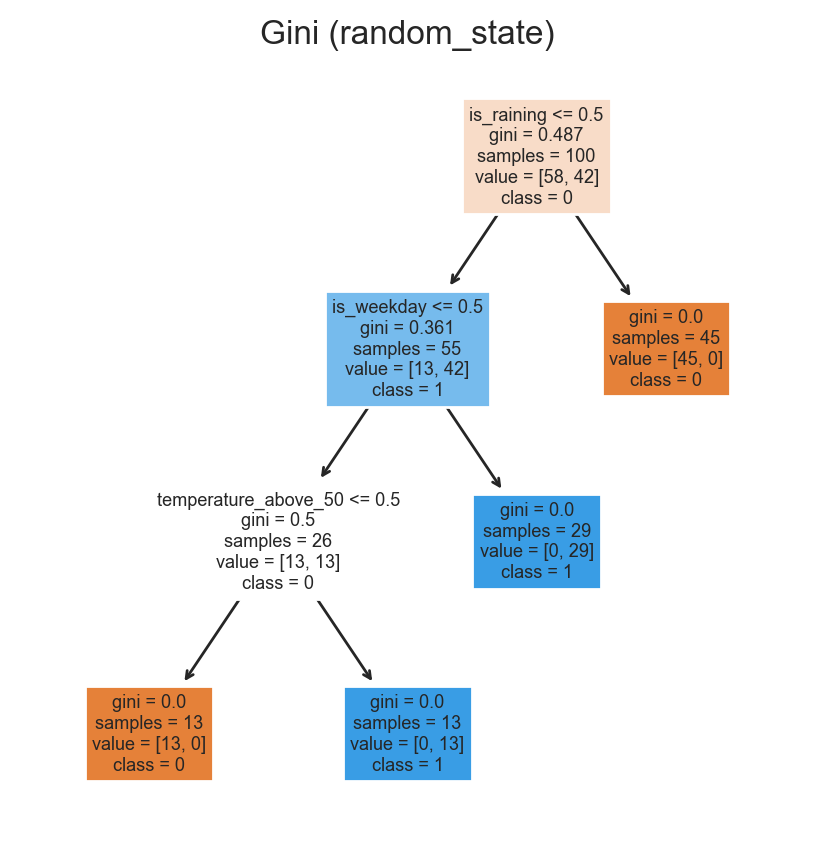

In [20]:
import matplotlib.pyplot as plt
#----------------- random_state = 0
classifier_entropy = DecisionTreeClassifier(max_depth=3, random_state=0)
classifier_entropy.fit(X_train, y_train)

plt.figure(figsize=(5,5))
plot_tree(classifier_entropy, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Gini (random_state = 0)")
plt.show()

#----------------- with random_state 

classifier_entropy = DecisionTreeClassifier(max_depth=3, random_state=15)
classifier_entropy.fit(X_train, y_train)

plt.figure(figsize=(5,5))
plot_tree(classifier_entropy, feature_names=df.keys().to_numpy()[:-1], class_names=['0', '1'], filled=True)
plt.title("Gini (random_state)")
plt.show()


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
#https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

stroke_df = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

In [23]:
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [24]:
one_hot_needed = [
    'gender',
    'ever_married',
    'work_type',
    'Residence_type',
    'smoking_status' 
]

In [25]:
#one-hot encoding
df = pd.get_dummies(data = stroke_df,
                         prefix = one_hot_needed,
                         columns = one_hot_needed)

In [26]:
df.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
6,53882,74.0,1,1,70.09,27.4,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
7,10434,69.0,0,0,94.39,22.8,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
8,27419,59.0,0,0,76.15,NaN,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
9,60491,78.0,0,0,58.57,24.2,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0


In [27]:
features_df = df.drop(['id','stroke'], axis=1)

features = features_df.columns.tolist()

features

['age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'ever_married_No',
 'ever_married_Yes',
 'work_type_Govt_job',
 'work_type_Never_worked',
 'work_type_Private',
 'work_type_Self-employed',
 'work_type_children',
 'Residence_type_Rural',
 'Residence_type_Urban',
 'smoking_status_Unknown',
 'smoking_status_formerly smoked',
 'smoking_status_never smoked',
 'smoking_status_smokes']

In [28]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

In [29]:
RANDOM_STATE = 15
df = df.fillna(0)
X_train, X_cv, y_train, y_cv = train_test_split(df[features], df['stroke'], train_size = 0.8, random_state = RANDOM_STATE)
print(f'Training samples: {X_train.shape}')
print(f'Cross-validation samples: {X_cv.shape}')



Training samples: (4088, 21)
Cross-validation samples: (1022, 21)


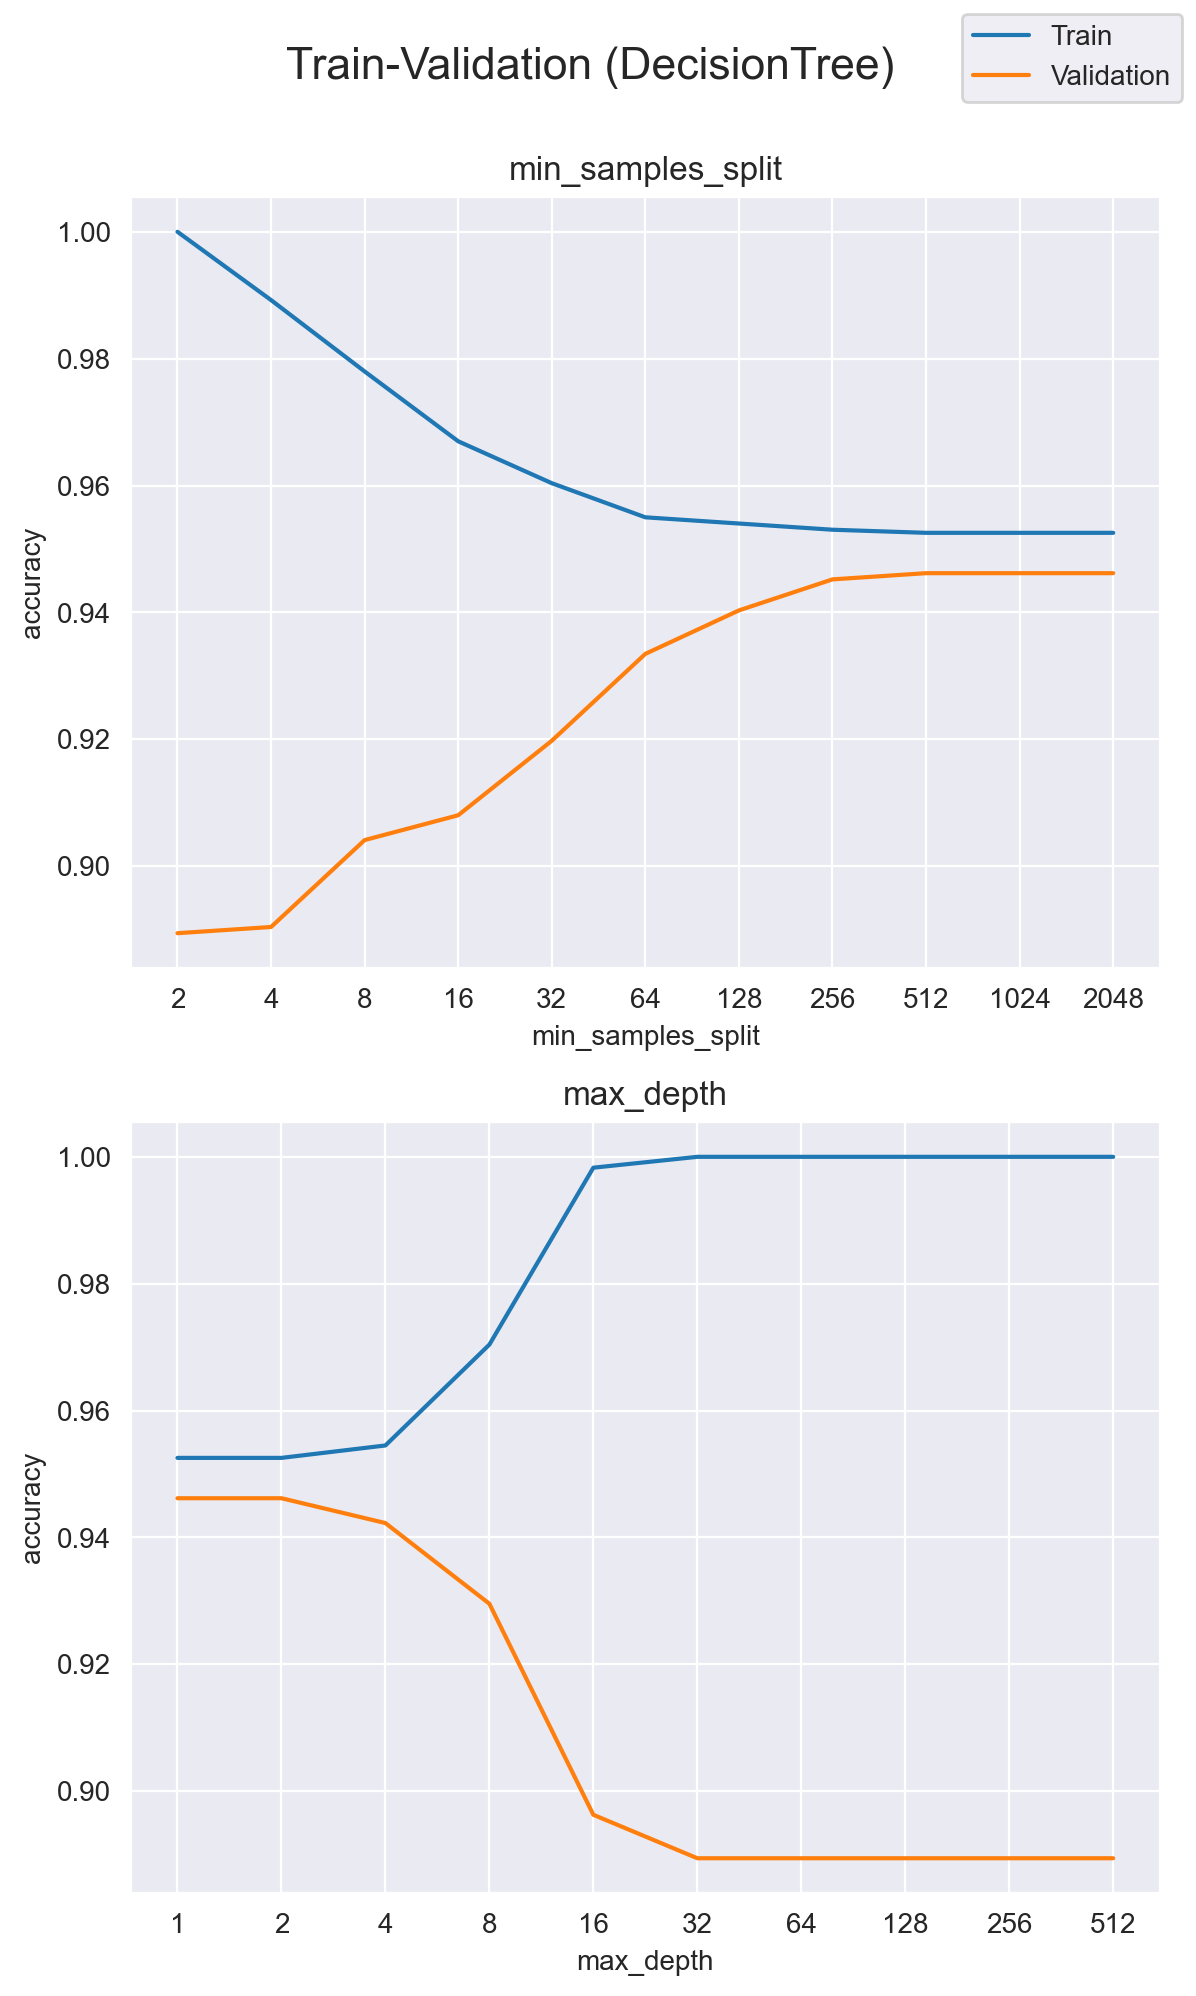

In [30]:
#sklearn.tree DecisionTreeClassifier

fig, axs = plt.subplots(2, 1, figsize=(6, 10))

fig.suptitle('Train-Validation (DecisionTree)\n', fontsize=16)

'''
Defaults: 

min_samples_split: 2
max_depth: None
'''
hyperparameters = {
    'min_samples_split': [2**i for i in range(1,12)],
    'max_depth': [2**i for i in range(10)]
}

for idx, (param, param_list) in enumerate(hyperparameters.items()):
    accuracy_list_train = []
    accuracy_list_cv = []
    
    for param_value in param_list:
        model = DecisionTreeClassifier(**{param: param_value},
                                       random_state = RANDOM_STATE).fit(X_train,y_train)
        
        #predicted values for the train dataset
        predictions_train = model.predict(X_train) 
        
        #predicted values for the validation dataset
        predictions_cv = model.predict(X_cv) 
        accuracy_train = accuracy_score(predictions_train,y_train)
        accuracy_cv = accuracy_score(predictions_cv,y_cv)
        accuracy_list_train.append(accuracy_train)
        accuracy_list_cv.append(accuracy_cv)
    
    axs[idx].set_title(param)
    axs[idx].set_xlabel(param)
    axs[idx].set_ylabel('accuracy')
    axs[idx].set_xticks(range(len(param_list)))
    axs[idx].set_xticklabels(param_list)
    axs[idx].plot(accuracy_list_train, label='Train')
    axs[idx].plot(accuracy_list_cv, label='Validation')

# removing duplicate legends
handles, labels = axs[0].get_legend_handles_labels()

# one single legend
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


In [31]:
decision_tree_model = DecisionTreeClassifier(min_samples_split = 256,max_depth = 4,
                                             random_state = RANDOM_STATE).fit(X_train,y_train)

In [32]:
from sklearn.model_selection import GridSearchCV

print("Accuracy Scores (DecisionTreeClassifier):\n")
print(f"Train: {accuracy_score(decision_tree_model.predict(X_train),y_train)}")
print(f"Cross-validation: {accuracy_score(decision_tree_model.predict(X_cv),y_cv)}")

param_grid = {
    'min_samples_split': [2**i for i in range(1,12)],
    'max_depth': [2**i for i in range(10)]
}

model = DecisionTreeClassifier(random_state = RANDOM_STATE)

#cv = 5 -> 5-fold cross-validation; each fold acts as a cv once
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("\nGridSearchCV (DecisionTreeClassifier) \n")
print("Best parameters found: ", grid_search.best_params_)
print("Best estimator found: ", grid_search.best_estimator_)
print("Best score found: ", grid_search.best_score_)


Accuracy Scores (DecisionTreeClassifier):

Train: 0.9525440313111546
Cross-validation: 0.9461839530332681

GridSearchCV (DecisionTreeClassifier) 

Best parameters found:  {'max_depth': 1, 'min_samples_split': 2}
Best estimator found:  DecisionTreeClassifier(max_depth=1, random_state=15)
Best score found:  0.9525441938273784


In [33]:
from sklearn.model_selection import cross_val_score
classifier = DecisionTreeClassifier(max_depth=3)
scores = cross_val_score(classifier, X_train, y_train, cv=5, scoring='accuracy')
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score}")

Mean accuracy: 0.9513208021475194


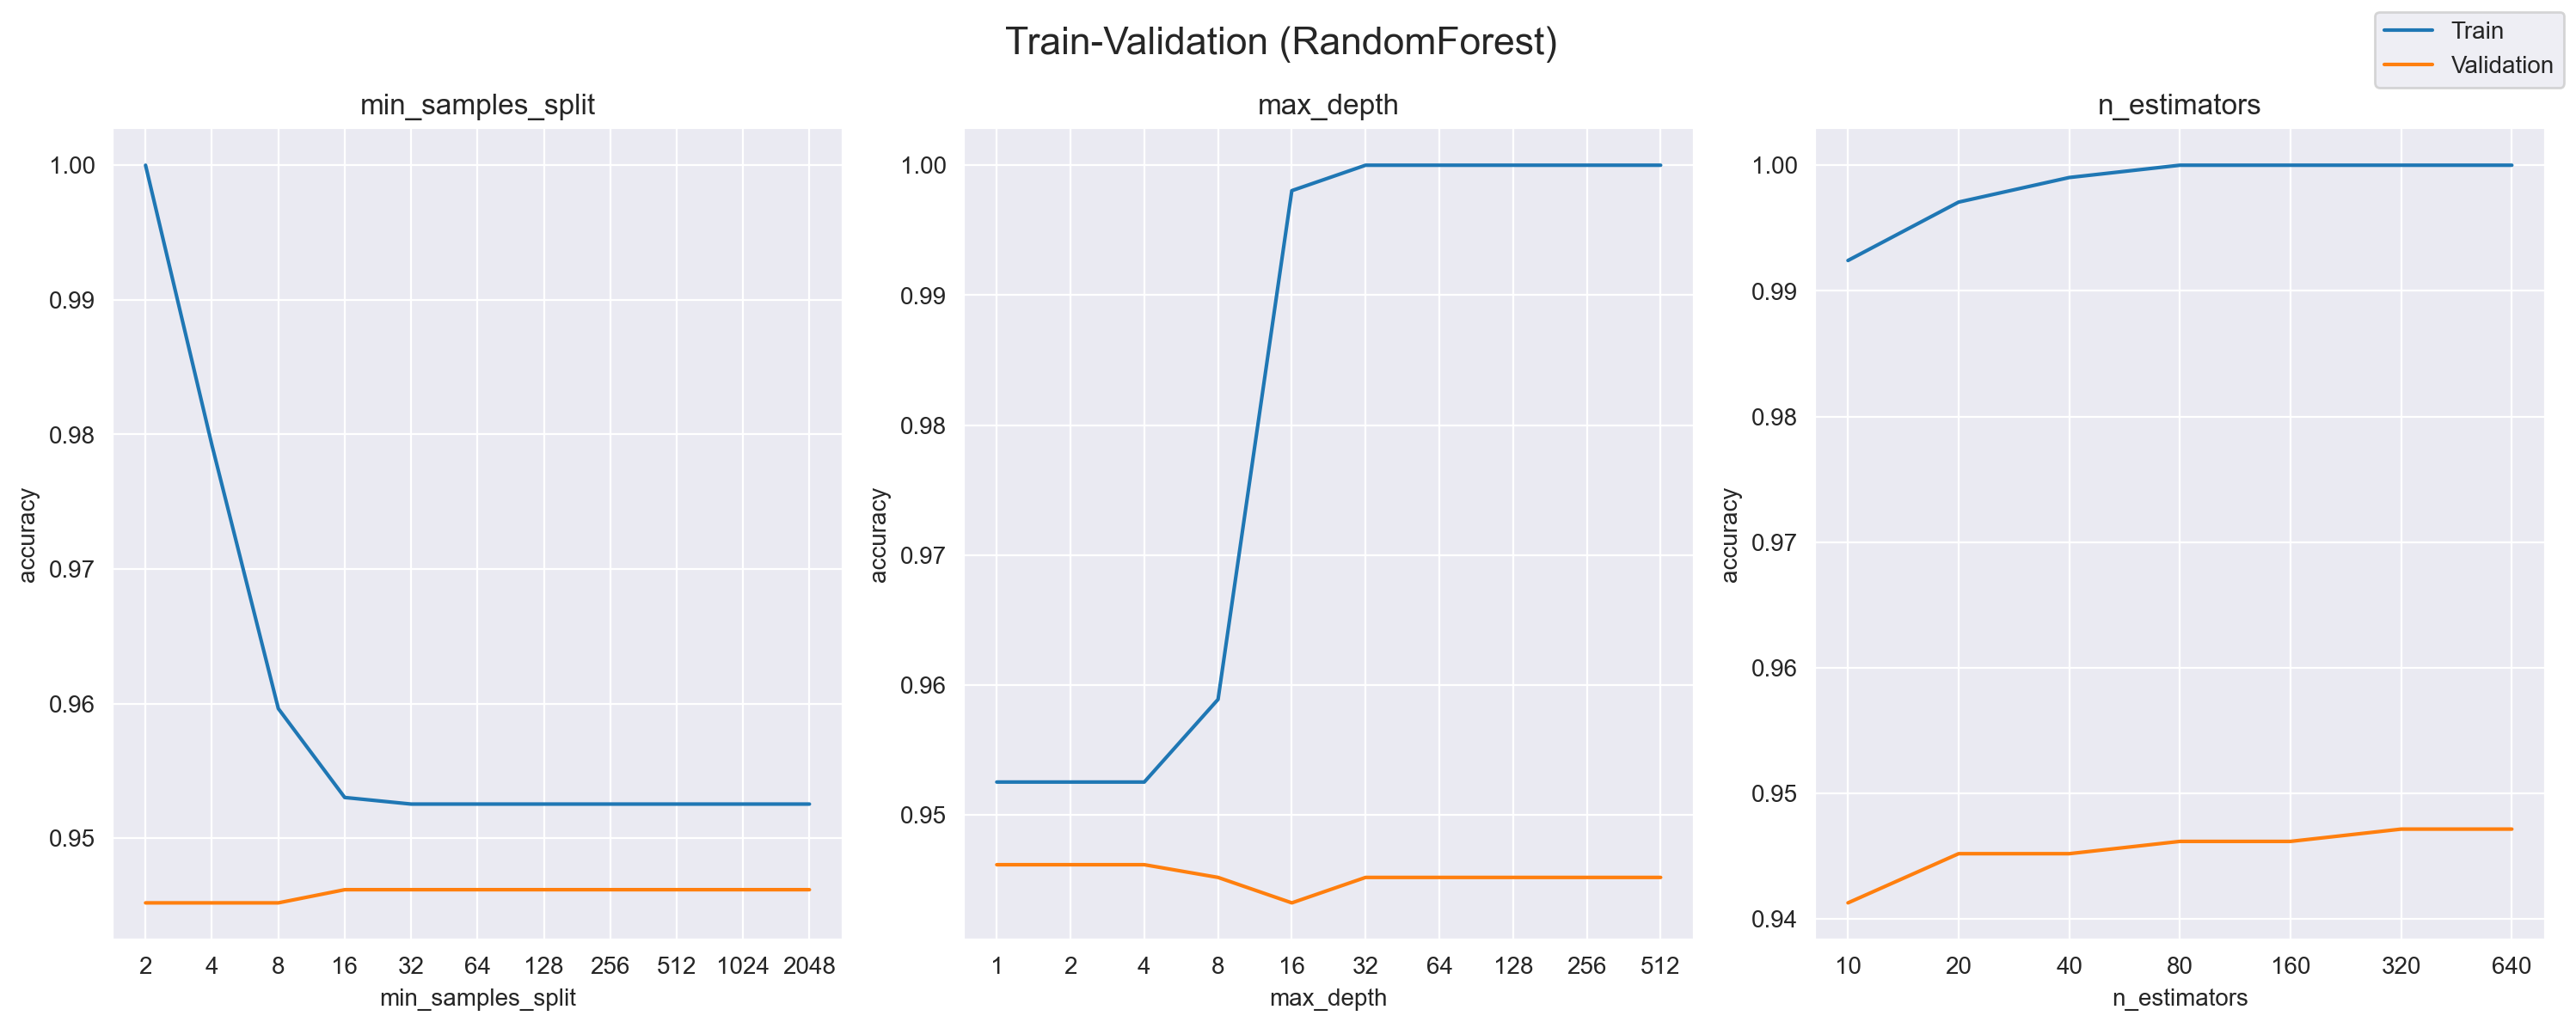

In [34]:
#sklearn.ensemble RandomForestClassifier

fig, axs = plt.subplots(1, 3, figsize=(15, 6))

fig.suptitle('Train-Validation (RandomForest)', fontsize=16)


'''
Defaults: 

min_samples_split: 2
max_depth: None
n_estimators: 100
max_features: sqrt
n_jobs: None (running trees parallelly)
'''

hyperparameters = {
    'min_samples_split': [2**i for i in range(1,12)],
    'max_depth': [2**i for i in range(10)],
    'n_estimators':[10*2**i for i in range(7)]
}

for idx, (param, param_list) in enumerate(hyperparameters.items()):
    accuracy_list_train = []
    accuracy_list_cv = []
    
    for param_value in param_list:
        model = RandomForestClassifier(**{param: param_value},
                                       random_state = RANDOM_STATE).fit(X_train,y_train)
        
        #predicted values for the train dataset
        predictions_train = model.predict(X_train) 
        
        #predicted values for the validation dataset
        predictions_cv = model.predict(X_cv) 
        accuracy_train = accuracy_score(predictions_train,y_train)
        accuracy_cv = accuracy_score(predictions_cv,y_cv)
        accuracy_list_train.append(accuracy_train)
        accuracy_list_cv.append(accuracy_cv)
    
    axs[idx].set_title(param)
    axs[idx].set_xlabel(param)
    axs[idx].set_ylabel('accuracy')
    axs[idx].set_xticks(range(len(param_list)))
    axs[idx].set_xticklabels(param_list)
    axs[idx].plot(accuracy_list_train, label='Train')
    axs[idx].plot(accuracy_list_cv, label='Validation')

# removing duplicate legends
handles, labels = axs[0].get_legend_handles_labels()

# one single legend
fig.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.show()


In [35]:
random_forest_model = RandomForestClassifier(min_samples_split = 8,max_depth = 8,
                                             random_state = RANDOM_STATE,n_jobs = 5, n_estimators = 20).fit(X_train,y_train)

In [36]:
print("Accuracy Scores (RandomForestClassifier):\n")
print(f"Train: {accuracy_score(random_forest_model.predict(X_train),y_train):}")
print(f"Cross-validation: {accuracy_score(random_forest_model.predict(X_cv),y_cv)}")


param_grid = {
    'min_samples_split': [2**i for i in range(1,6)],
    'max_depth': [2**i for i in range(6)],
    'n_estimators':[10*2**i for i in range(6)]
}

model = RandomForestClassifier(random_state = RANDOM_STATE, n_jobs = 5)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("\nGridSearchCV (RandomForestClassifier)")
print("Best parameters found: ", grid_search.best_params_)
print("Best estimator found: ", grid_search.best_estimator_)
print("Best score found: ", grid_search.best_score_)


Accuracy Scores (RandomForestClassifier):

Train: 0.9540117416829745
Cross-validation: 0.9461839530332681

GridSearchCV (RandomForestClassifier)
Best parameters found:  {'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 20}
Best estimator found:  RandomForestClassifier(max_depth=8, min_samples_split=8, n_estimators=20,
                       n_jobs=5, random_state=15)
Best score found:  0.9530334906465002


In [37]:
from sklearn.model_selection import cross_val_score
classifier_rf = RandomForestClassifier(min_samples_split = 8,max_depth = 8,
                                             random_state = RANDOM_STATE,n_jobs = 5, n_estimators = 20)
scores = cross_val_score(classifier_rf, X_train, y_train, cv=5, scoring='accuracy')
mean_score = scores.mean()

print(f"Mean accuracy: {mean_score}")

Mean accuracy: 0.9530334906465002


In [40]:
#XG BOOST

from xgboost import XGBClassifier

XGB_model = XGBClassifier(n_estimators=100, learning_rate=0.1, verbosity=1,
                          random_state=RANDOM_STATE, eval_metric='logloss')
XGB_model.set_params(early_stopping_rounds=9)
XGB_model.fit(X_train.to_numpy(), y_train.to_numpy(), eval_set=[(X_cv.to_numpy(), y_cv.to_numpy())])




[0]	validation_0-logloss:0.61461
[1]	validation_0-logloss:0.55009
[2]	validation_0-logloss:0.49645
[3]	validation_0-logloss:0.45128
[4]	validation_0-logloss:0.41297
[5]	validation_0-logloss:0.38026
[6]	validation_0-logloss:0.35234
[7]	validation_0-logloss:0.32853
[8]	validation_0-logloss:0.30761
[9]	validation_0-logloss:0.28955
[10]	validation_0-logloss:0.27388
[11]	validation_0-logloss:0.25982
[12]	validation_0-logloss:0.24774
[13]	validation_0-logloss:0.23774
[14]	validation_0-logloss:0.22851
[15]	validation_0-logloss:0.22065
[16]	validation_0-logloss:0.21384
[17]	validation_0-logloss:0.20787
[18]	validation_0-logloss:0.20245
[19]	validation_0-logloss:0.19786
[20]	validation_0-logloss:0.19362
[21]	validation_0-logloss:0.18990
[22]	validation_0-logloss:0.18695
[23]	validation_0-logloss:0.18378
[24]	validation_0-logloss:0.18155
[25]	validation_0-logloss:0.17970
[26]	validation_0-logloss:0.17766
[27]	validation_0-logloss:0.17628
[28]	validation_0-logloss:0.17497
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=9,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=15, ...)

In [41]:
print("XGB scores:\n")
print("Best Iteration: ",XGB_model.best_iteration)
print(f"Train Accuracy: {accuracy_score(XGB_model.predict(X_train),y_train)}")
print(f"Cross-validation Accuracy: {accuracy_score(XGB_model.predict(X_cv),y_cv)}")

XGB scores:

Best Iteration:  46
Train Accuracy: 0.9613502935420744
Cross-validation Accuracy: 0.9461839530332681
